## Creating the Multiclass MURA dataset ##

In [17]:
import pandas as pd

def extract_body_part(path):
    """Extracts the body part from a given path in the dataset."""
    return path.split('/')[2][3:]  # This splits by '/' and takes the substring after 'XR_'

def create_combined_label(row):
    """Creates a combined label from the abnormality status and body part."""
    status = 'Abnormal' if row['abnormality'] == 1 else 'Normal'
    return f'{status}-{row["body_part"]}'

In [18]:
def load_and_transform_data(filepath):
    """Loads data from a CSV file, transforms it by extracting body parts and creating new labels."""
    # Load the dataset without a header and name the columns
    data = pd.read_csv(filepath, header=None, names=['path', 'abnormality'])

    # Extract body part and create a new label
    data['body_part'] = data['path'].apply(extract_body_part)
    data['label'] = data.apply(create_combined_label, axis=1)

    return data

# File paths
train_labels_path = 'train_labeled_studies.csv'
valid_labels_path = 'valid_labeled_studies.csv'

# Transform datasets
train_data = load_and_transform_data(train_labels_path)
valid_data = load_and_transform_data(valid_labels_path)

In [19]:
print("Training Data Sample:")
print(train_data.head())

print("\nValidation Data Sample:")
print(valid_data.head())

Training Data Sample:
                                                path  abnormality body_part  \
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...            1  SHOULDER   
1  MURA-v1.1/train/XR_SHOULDER/patient00002/study...            1  SHOULDER   
2  MURA-v1.1/train/XR_SHOULDER/patient00003/study...            1  SHOULDER   
3  MURA-v1.1/train/XR_SHOULDER/patient00004/study...            1  SHOULDER   
4  MURA-v1.1/train/XR_SHOULDER/patient00005/study...            1  SHOULDER   

               label  
0  Abnormal-SHOULDER  
1  Abnormal-SHOULDER  
2  Abnormal-SHOULDER  
3  Abnormal-SHOULDER  
4  Abnormal-SHOULDER  

Validation Data Sample:
                                                path  abnormality body_part  \
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...            1     WRIST   
1  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...            1     WRIST   
2  MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...            1     WRIST   
3  MURA-v1.1/valid/XR_WR

In [20]:
# Save the transformed data back to new CSV files for future use
train_data.to_csv('multiclass_train_data_transformed.csv', index=False)
valid_data.to_csv('multiclass_valid_data_transformed.csv', index=False)

In [50]:
import os
import shutil
from tqdm import tqdm
import pandas as pd

def extract_details(path):
    parts = path.split('/')
    print(f"Full path: {path}")  # Debugging: Show the full path
    body_part = parts[1][3:]  # Remove 'XR_' prefix
    print(f"Body part extracted: {body_part}")  # Debugging: Show the body part extracted

    # Check if 'positive' or 'negative' is in the study type part of the path
    study_type = parts[3]
    print(f"Study type segment in path: {study_type}")  # Debugging: Show the study type part of the path
    
    if 'positive' in study_type:
        abnormality = 'Abnormal'
    elif 'negative' in study_type:
        abnormality = 'Normal'
    else:
        raise ValueError(f"Unexpected study type in path: {path}")
    
    return body_part, abnormality

data = pd.read_csv('valid_image_paths.csv', names=['path'])

# Remove 'MURA-v1.1/' prefix if it exists in the path
data['path'] = data['path'].apply(lambda x: x.replace('MURA-v1.1/', ''))

image_counter = {}  # Keep track of the count of images for each category

def organize_and_rename_images(data, source_root, target_root):
    for _, row in tqdm(data.iterrows(), total=len(data)):
        body_part, abnormality = extract_details(row['path'])
        directory_name = f"{abnormality}-{body_part.upper()}"  # E.g., 'Abnormal-WRIST'
        image_name_prefix = f"{abnormality.lower()}_{body_part.lower()}"  # E.g., 'abnormal_wrist'
        
        image_counter[directory_name] = image_counter.get(directory_name, 0) + 1
        
        source_file = os.path.join(source_root, row['path'])
        target_dir = os.path.join(target_root, directory_name)
        
        new_filename = f"{image_name_prefix}_{image_counter[directory_name]}.png"
        target_file = os.path.join(target_dir, new_filename)
        
        os.makedirs(target_dir, exist_ok=True)
        
        shutil.move(source_file, target_file)
        print(f"Moved and renamed: {source_file} to {target_file}")

source_root = '.'  # The current directory
target_root = 'multiclass_valid'

organize_and_rename_images(data, source_root, target_root)

  1%|          | 17/3197 [00:00<00:19, 165.39it/s]

Full path: valid/XR_WRIST/patient11185/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11185/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_1.png
Full path: valid/XR_WRIST/patient11185/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11185/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_2.png
Full path: valid/XR_WRIST/patient11185/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11185/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_3.png
Full path: valid/XR_WRIST/patient11185/study1_positive/image4.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11185/study1_

  2%|▏         | 58/3197 [00:00<00:16, 189.25it/s]

Moved and renamed: ./valid/XR_WRIST/patient11195/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_37.png
Full path: valid/XR_WRIST/patient11196/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11196/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_38.png
Full path: valid/XR_WRIST/patient11196/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11196/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_39.png
Full path: valid/XR_WRIST/patient11196/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11196/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_40.png
Full path: valid/XR_WRIST/patient11196/study1_positive/im

  3%|▎         | 101/3197 [00:00<00:15, 200.68it/s]

Moved and renamed: ./valid/XR_WRIST/patient11209/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_77.png
Full path: valid/XR_WRIST/patient11210/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11210/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_78.png
Full path: valid/XR_WRIST/patient11210/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11210/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_79.png
Full path: valid/XR_WRIST/patient11210/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11210/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_80.png
Full path: valid/XR_WRIST/patient11211/study1_positive/im

  5%|▍         | 144/3197 [00:00<00:15, 200.76it/s]

Moved and renamed: ./valid/XR_WRIST/patient11220/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_113.png
Full path: valid/XR_WRIST/patient11220/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11220/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_114.png
Full path: valid/XR_WRIST/patient11221/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11221/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_115.png
Full path: valid/XR_WRIST/patient11221/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11221/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_116.png
Full path: valid/XR_WRIST/patient11221/study1_positiv

  6%|▌         | 186/3197 [00:00<00:15, 197.19it/s]

Moved and renamed: ./valid/XR_WRIST/patient11230/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_143.png
Full path: valid/XR_WRIST/patient11230/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11230/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_144.png
Full path: valid/XR_WRIST/patient11230/study2_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11230/study2_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_20.png
Full path: valid/XR_WRIST/patient11231/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11231/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_145.png
Full path: valid/XR_WRIST/patient11231/study1_positive/ima

  7%|▋         | 226/3197 [00:01<00:15, 189.90it/s]

Moved and renamed: ./valid/XR_WRIST/patient11239/study2_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_26.png
Full path: valid/XR_WRIST/patient11240/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11240/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_176.png
Full path: valid/XR_WRIST/patient11240/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11240/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_177.png
Full path: valid/XR_WRIST/patient11240/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11240/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_178.png
Full path: valid/XR_WRIST/patient11241/study1_positive/ima

  8%|▊         | 266/3197 [00:01<00:15, 185.37it/s]

Moved and renamed: ./valid/XR_WRIST/patient11251/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_212.png
Full path: valid/XR_WRIST/patient11251/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11251/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_213.png
Full path: valid/XR_WRIST/patient11251/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11251/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_214.png
Full path: valid/XR_WRIST/patient11252/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11252/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_215.png
Full path: valid/XR_WRIST/patient11252/study1_positiv

 10%|▉         | 307/3197 [00:01<00:15, 192.01it/s]

Moved and renamed: ./valid/XR_WRIST/patient11262/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_247.png
Full path: valid/XR_WRIST/patient11262/study1_positive/image3.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11262/study1_positive/image3.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_248.png
Full path: valid/XR_WRIST/patient11263/study1_positive/image1.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11263/study1_positive/image1.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_249.png
Full path: valid/XR_WRIST/patient11263/study1_positive/image2.png
Body part extracted: WRIST
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_WRIST/patient11263/study1_positive/image2.png to multiclass_valid/Abnormal-WRIST/abnormal_wrist_250.png
Full path: valid/XR_WRIST/patient11263/study1_positiv

 11%|█         | 347/3197 [00:01<00:14, 193.60it/s]

Moved and renamed: ./valid/XR_WRIST/patient11272/study3_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_37.png
Full path: valid/XR_WRIST/patient11272/study3_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study3_negative
Moved and renamed: ./valid/XR_WRIST/patient11272/study3_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_38.png
Full path: valid/XR_WRIST/patient11272/study3_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study3_negative
Moved and renamed: ./valid/XR_WRIST/patient11272/study3_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_39.png
Full path: valid/XR_WRIST/patient11272/study4_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study4_negative
Moved and renamed: ./valid/XR_WRIST/patient11272/study4_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_40.png
Full path: valid/XR_WRIST/patient11272/study4_negative/image2.png
Body pa

 12%|█▏        | 387/3197 [00:02<00:15, 183.22it/s]

Moved and renamed: ./valid/XR_WRIST/patient11283/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_59.png
Full path: valid/XR_WRIST/patient11283/study2_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11283/study2_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_60.png
Full path: valid/XR_WRIST/patient11284/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11284/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_61.png
Full path: valid/XR_WRIST/patient11284/study1_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11284/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_62.png
Full path: valid/XR_WRIST/patient11285/study1_negative/image1.png
Body pa

 13%|█▎        | 425/3197 [00:02<00:15, 181.73it/s]

Moved and renamed: ./valid/XR_WRIST/patient11300/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_94.png
Full path: valid/XR_WRIST/patient11301/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11301/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_95.png
Full path: valid/XR_WRIST/patient11301/study1_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11301/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_96.png
Full path: valid/XR_WRIST/patient11302/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11302/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_97.png
Full path: valid/XR_WRIST/patient11303/study1_negative/image1.png
Body pa

 15%|█▍        | 467/3197 [00:02<00:14, 193.58it/s]

Moved and renamed: ./valid/XR_WRIST/patient11317/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_131.png
Full path: valid/XR_WRIST/patient11317/study2_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11317/study2_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_132.png
Full path: valid/XR_WRIST/patient11317/study2_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11317/study2_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_133.png
Full path: valid/XR_WRIST/patient11317/study2_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11317/study2_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_134.png
Full path: valid/XR_WRIST/patient11318/study1_negative/image1.png
Bod

 16%|█▌        | 509/3197 [00:02<00:13, 199.68it/s]

Moved and renamed: ./valid/XR_WRIST/patient11330/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_173.png
Full path: valid/XR_WRIST/patient11330/study2_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11330/study2_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_174.png
Full path: valid/XR_WRIST/patient11330/study2_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11330/study2_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_175.png
Full path: valid/XR_WRIST/patient11330/study2_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_WRIST/patient11330/study2_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_176.png
Full path: valid/XR_WRIST/patient11331/study1_negative/image1.png
Bod

 17%|█▋        | 530/3197 [00:02<00:13, 197.15it/s]

Moved and renamed: ./valid/XR_WRIST/patient11342/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_215.png
Full path: valid/XR_WRIST/patient11343/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11343/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_216.png
Full path: valid/XR_WRIST/patient11343/study1_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11343/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_217.png
Full path: valid/XR_WRIST/patient11343/study1_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11343/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_218.png
Full path: valid/XR_WRIST/patient11344/study1_negative/image1.png
Bod

 18%|█▊        | 570/3197 [00:02<00:13, 193.66it/s]

Moved and renamed: ./valid/XR_WRIST/patient11354/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_254.png
Full path: valid/XR_WRIST/patient11355/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11355/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_255.png
Full path: valid/XR_WRIST/patient11355/study1_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11355/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_256.png
Full path: valid/XR_WRIST/patient11355/study1_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11355/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_257.png
Full path: valid/XR_WRIST/patient11356/study1_negative/image1.png
Bod

 19%|█▉        | 611/3197 [00:03<00:13, 197.07it/s]

Moved and renamed: ./valid/XR_WRIST/patient11369/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_295.png
Full path: valid/XR_WRIST/patient11369/study1_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11369/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_296.png
Full path: valid/XR_WRIST/patient11369/study1_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11369/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_297.png
Full path: valid/XR_WRIST/patient11370/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11370/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_298.png
Full path: valid/XR_WRIST/patient11370/study1_negative/image2.png
Bod

 20%|██        | 653/3197 [00:03<00:12, 200.20it/s]

Moved and renamed: ./valid/XR_WRIST/patient11382/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_336.png
Full path: valid/XR_WRIST/patient11383/study1_negative/image1.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11383/study1_negative/image1.png to multiclass_valid/Normal-WRIST/normal_wrist_337.png
Full path: valid/XR_WRIST/patient11383/study1_negative/image2.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11383/study1_negative/image2.png to multiclass_valid/Normal-WRIST/normal_wrist_338.png
Full path: valid/XR_WRIST/patient11383/study1_negative/image3.png
Body part extracted: WRIST
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_WRIST/patient11383/study1_negative/image3.png to multiclass_valid/Normal-WRIST/normal_wrist_339.png
Full path: valid/XR_WRIST/patient11384/study1_negative/image1.png
Bod

 22%|██▏       | 695/3197 [00:03<00:12, 201.75it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11398/study1_positive/image1.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_14.png
Full path: valid/XR_FOREARM/patient11398/study1_positive/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11398/study1_positive/image2.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_15.png
Full path: valid/XR_FOREARM/patient11398/study1_positive/image3.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11398/study1_positive/image3.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_16.png
Full path: valid/XR_FOREARM/patient11328/study1_positive/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11328/study1_positive/image1.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_17.png
Full path: valid/XR_F

 23%|██▎       | 738/3197 [00:03<00:12, 202.32it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11413/study1_positive/image1.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_54.png
Full path: valid/XR_FOREARM/patient11413/study1_positive/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11413/study1_positive/image2.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_55.png
Full path: valid/XR_FOREARM/patient11414/study1_positive/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11414/study1_positive/image1.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_56.png
Full path: valid/XR_FOREARM/patient11414/study1_positive/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11414/study1_positive/image2.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_57.png
Full path: valid/XR_F

 24%|██▍       | 779/3197 [00:04<00:12, 194.22it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11426/study1_positive/image1.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_92.png
Full path: valid/XR_FOREARM/patient11426/study1_positive/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11426/study1_positive/image2.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_93.png
Full path: valid/XR_FOREARM/patient11427/study1_positive/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11427/study1_positive/image1.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_94.png
Full path: valid/XR_FOREARM/patient11427/study1_positive/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11427/study1_positive/image2.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_95.png
Full path: valid/XR_F

 26%|██▌       | 819/3197 [00:04<00:13, 176.71it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11438/study1_positive/image2.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_129.png
Full path: valid/XR_FOREARM/patient11438/study1_positive/image3.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11438/study1_positive/image3.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_130.png
Full path: valid/XR_FOREARM/patient11438/study1_positive/image4.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11438/study1_positive/image4.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_131.png
Full path: valid/XR_FOREARM/patient11438/study1_positive/image5.png
Body part extracted: FOREARM
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FOREARM/patient11438/study1_positive/image5.png to multiclass_valid/Abnormal-FOREARM/abnormal_forearm_132.png
Full path: valid/

 27%|██▋       | 862/3197 [00:04<00:11, 194.61it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11283/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_15.png
Full path: valid/XR_FOREARM/patient11283/study1_negative/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11283/study1_negative/image2.png to multiclass_valid/Normal-FOREARM/normal_forearm_16.png
Full path: valid/XR_FOREARM/patient11450/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11450/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_17.png
Full path: valid/XR_FOREARM/patient11450/study1_negative/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11450/study1_negative/image2.png to multiclass_valid/Normal-FOREARM/normal_forearm_18.png
Full path: valid/XR_FOREARM/patient11

 28%|██▊       | 905/3197 [00:04<00:11, 201.06it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11466/study1_negative/image3.png to multiclass_valid/Normal-FOREARM/normal_forearm_58.png
Full path: valid/XR_FOREARM/patient11467/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11467/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_59.png
Full path: valid/XR_FOREARM/patient11467/study1_negative/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11467/study1_negative/image2.png to multiclass_valid/Normal-FOREARM/normal_forearm_60.png
Full path: valid/XR_FOREARM/patient11468/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11468/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_61.png
Full path: valid/XR_FOREARM/patient11

 30%|██▉       | 947/3197 [00:04<00:11, 197.31it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11481/study1_negative/image5.png to multiclass_valid/Normal-FOREARM/normal_forearm_100.png
Full path: valid/XR_FOREARM/patient11482/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11482/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_101.png
Full path: valid/XR_FOREARM/patient11482/study1_negative/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11482/study1_negative/image2.png to multiclass_valid/Normal-FOREARM/normal_forearm_102.png
Full path: valid/XR_FOREARM/patient11483/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11483/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_103.png
Full path: valid/XR_FOREARM/patie

 31%|███       | 988/3197 [00:05<00:11, 196.92it/s]

Moved and renamed: ./valid/XR_FOREARM/patient11255/study1_negative/image3.png to multiclass_valid/Normal-FOREARM/normal_forearm_140.png
Full path: valid/XR_FOREARM/patient11495/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11495/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_141.png
Full path: valid/XR_FOREARM/patient11495/study1_negative/image2.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11495/study1_negative/image2.png to multiclass_valid/Normal-FOREARM/normal_forearm_142.png
Full path: valid/XR_FOREARM/patient11376/study1_negative/image1.png
Body part extracted: FOREARM
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FOREARM/patient11376/study1_negative/image1.png to multiclass_valid/Normal-FOREARM/normal_forearm_143.png
Full path: valid/XR_FOREARM/patie

 32%|███▏      | 1028/3197 [00:05<00:11, 192.45it/s]

Moved and renamed: ./valid/XR_HAND/patient11506/study1_positive/image2.png to multiclass_valid/Abnormal-HAND/abnormal_hand_30.png
Full path: valid/XR_HAND/patient11506/study1_positive/image3.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11506/study1_positive/image3.png to multiclass_valid/Abnormal-HAND/abnormal_hand_31.png
Full path: valid/XR_HAND/patient11507/study1_positive/image1.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11507/study1_positive/image1.png to multiclass_valid/Abnormal-HAND/abnormal_hand_32.png
Full path: valid/XR_HAND/patient11507/study1_positive/image2.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11507/study1_positive/image2.png to multiclass_valid/Abnormal-HAND/abnormal_hand_33.png
Full path: valid/XR_HAND/patient11507/study1_positive/image3.png
Body part 

 33%|███▎      | 1049/3197 [00:05<00:10, 195.65it/s]

Full path: valid/XR_HAND/patient11275/study1_positive/image2.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11275/study1_positive/image2.png to multiclass_valid/Abnormal-HAND/abnormal_hand_69.png
Full path: valid/XR_HAND/patient11275/study1_positive/image3.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11275/study1_positive/image3.png to multiclass_valid/Abnormal-HAND/abnormal_hand_70.png
Full path: valid/XR_HAND/patient11517/study1_positive/image1.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11517/study1_positive/image1.png to multiclass_valid/Abnormal-HAND/abnormal_hand_71.png
Full path: valid/XR_HAND/patient11517/study1_positive/image2.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11517/study1_positive/image2

 34%|███▍      | 1090/3197 [00:05<00:10, 200.00it/s]

Moved and renamed: ./valid/XR_HAND/patient11526/study1_positive/image3.png to multiclass_valid/Abnormal-HAND/abnormal_hand_103.png
Full path: valid/XR_HAND/patient11526/study1_positive/image4.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11526/study1_positive/image4.png to multiclass_valid/Abnormal-HAND/abnormal_hand_104.png
Full path: valid/XR_HAND/patient11527/study1_positive/image1.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11527/study1_positive/image1.png to multiclass_valid/Abnormal-HAND/abnormal_hand_105.png
Full path: valid/XR_HAND/patient11527/study1_positive/image2.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11527/study1_positive/image2.png to multiclass_valid/Abnormal-HAND/abnormal_hand_106.png
Full path: valid/XR_HAND/patient11319/study1_positive/image1.png
Body p

 35%|███▌      | 1132/3197 [00:05<00:10, 193.75it/s]

Moved and renamed: ./valid/XR_HAND/patient11382/study2_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_7.png
Full path: valid/XR_HAND/patient11382/study2_negative/image2.png
Body part extracted: HAND
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_HAND/patient11382/study2_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_8.png
Full path: valid/XR_HAND/patient11382/study2_negative/image3.png
Body part extracted: HAND
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_HAND/patient11382/study2_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_9.png
Full path: valid/XR_HAND/patient11533/study1_positive/image1.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11533/study1_positive/image1.png to multiclass_valid/Abnormal-HAND/abnormal_hand_141.png
Full path: valid/XR_HAND/patient11533/study1_positive/image2.png
Body part extracted: HAN

 37%|███▋      | 1174/3197 [00:06<00:10, 199.00it/s]

Moved and renamed: ./valid/XR_HAND/patient11543/study1_positive/image3.png to multiclass_valid/Abnormal-HAND/abnormal_hand_180.png
Full path: valid/XR_HAND/patient11544/study1_positive/image1.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11544/study1_positive/image1.png to multiclass_valid/Abnormal-HAND/abnormal_hand_181.png
Full path: valid/XR_HAND/patient11544/study1_positive/image2.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11544/study1_positive/image2.png to multiclass_valid/Abnormal-HAND/abnormal_hand_182.png
Full path: valid/XR_HAND/patient11544/study1_positive/image3.png
Body part extracted: HAND
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HAND/patient11544/study1_positive/image3.png to multiclass_valid/Abnormal-HAND/abnormal_hand_183.png
Full path: valid/XR_HAND/patient11545/study1_positive/image1.png
Body p

 38%|███▊      | 1218/3197 [00:06<00:09, 206.09it/s]

Moved and renamed: ./valid/XR_HAND/patient11555/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_42.png
Full path: valid/XR_HAND/patient11555/study1_negative/image3.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11555/study1_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_43.png
Full path: valid/XR_HAND/patient11556/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11556/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_44.png
Full path: valid/XR_HAND/patient11556/study1_negative/image2.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11556/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_45.png
Full path: valid/XR_HAND/patient11556/study1_negative/image3.png
Body part extracted: HAND


 40%|███▉      | 1263/3197 [00:06<00:09, 211.91it/s]

Moved and renamed: ./valid/XR_HAND/patient11565/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_86.png
Full path: valid/XR_HAND/patient11566/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11566/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_87.png
Full path: valid/XR_HAND/patient11566/study1_negative/image2.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11566/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_88.png
Full path: valid/XR_HAND/patient11567/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11567/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_89.png
Full path: valid/XR_HAND/patient11567/study1_negative/image2.png
Body part extracted: HAND


 41%|████      | 1307/3197 [00:06<00:08, 211.28it/s]

Moved and renamed: ./valid/XR_HAND/patient11235/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_130.png
Full path: valid/XR_HAND/patient11235/study1_negative/image3.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11235/study1_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_131.png
Full path: valid/XR_HAND/patient11313/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11313/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_132.png
Full path: valid/XR_HAND/patient11313/study1_negative/image2.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11313/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_133.png
Full path: valid/XR_HAND/patient11313/study1_negative/image3.png
Body part extracted: H

 42%|████▏     | 1350/3197 [00:06<00:08, 208.22it/s]

Moved and renamed: ./valid/XR_HAND/patient11420/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_172.png
Full path: valid/XR_HAND/patient11586/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11586/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_173.png
Full path: valid/XR_HAND/patient11586/study1_negative/image2.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11586/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_174.png
Full path: valid/XR_HAND/patient11586/study1_negative/image3.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11586/study1_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_175.png
Full path: valid/XR_HAND/patient11337/study1_negative/image1.png
Body part extracted: H

 44%|████▎     | 1392/3197 [00:07<00:08, 201.01it/s]

Moved and renamed: ./valid/XR_HAND/patient11302/study1_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_213.png
Full path: valid/XR_HAND/patient11595/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11595/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_214.png
Full path: valid/XR_HAND/patient11595/study1_negative/image2.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11595/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_215.png
Full path: valid/XR_HAND/patient11595/study1_negative/image3.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11595/study1_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_216.png
Full path: valid/XR_HAND/patient11365/study1_negative/image1.png
Body part extracted: H

 45%|████▍     | 1434/3197 [00:07<00:08, 200.34it/s]

Moved and renamed: ./valid/XR_HAND/patient11603/study2_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_253.png
Full path: valid/XR_HAND/patient11461/study1_negative/image1.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11461/study1_negative/image1.png to multiclass_valid/Normal-HAND/normal_hand_254.png
Full path: valid/XR_HAND/patient11461/study1_negative/image2.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11461/study1_negative/image2.png to multiclass_valid/Normal-HAND/normal_hand_255.png
Full path: valid/XR_HAND/patient11461/study1_negative/image3.png
Body part extracted: HAND
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HAND/patient11461/study1_negative/image3.png to multiclass_valid/Normal-HAND/normal_hand_256.png
Full path: valid/XR_HAND/patient11604/study1_negative/image1.png
Body part extracted: H

 46%|████▌     | 1476/3197 [00:07<00:08, 201.84it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11186/study1_positive/image2.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_23.png
Full path: valid/XR_HUMERUS/patient11615/study1_positive/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11615/study1_positive/image1.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_24.png
Full path: valid/XR_HUMERUS/patient11615/study1_positive/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11615/study1_positive/image2.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_25.png
Full path: valid/XR_HUMERUS/patient11616/study1_positive/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11616/study1_positive/image1.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_26.png
Full path: valid/XR_H

 47%|████▋     | 1518/3197 [00:07<00:08, 198.98it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11634/study1_positive/image1.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_64.png
Full path: valid/XR_HUMERUS/patient11634/study1_positive/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11634/study1_positive/image2.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_65.png
Full path: valid/XR_HUMERUS/patient11635/study1_positive/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11635/study1_positive/image1.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_66.png
Full path: valid/XR_HUMERUS/patient11635/study1_positive/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11635/study1_positive/image2.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_67.png
Full path: valid/XR_H

 49%|████▉     | 1559/3197 [00:07<00:08, 200.46it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11227/study1_positive/image1.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_103.png
Full path: valid/XR_HUMERUS/patient11227/study1_positive/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11227/study1_positive/image2.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_104.png
Full path: valid/XR_HUMERUS/patient11648/study1_positive/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11648/study1_positive/image1.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_105.png
Full path: valid/XR_HUMERUS/patient11648/study1_positive/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_HUMERUS/patient11648/study1_positive/image2.png to multiclass_valid/Abnormal-HUMERUS/abnormal_humerus_106.png
Full path: valid/

 50%|█████     | 1600/3197 [00:08<00:08, 198.85it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11660/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_4.png
Full path: valid/XR_HUMERUS/patient11661/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11661/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_5.png
Full path: valid/XR_HUMERUS/patient11661/study1_negative/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11661/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_6.png
Full path: valid/XR_HUMERUS/patient11662/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11662/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_7.png
Full path: valid/XR_HUMERUS/patient11662/

 51%|█████▏    | 1645/3197 [00:08<00:07, 208.49it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11672/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_45.png
Full path: valid/XR_HUMERUS/patient11673/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11673/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_46.png
Full path: valid/XR_HUMERUS/patient11673/study1_negative/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11673/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_47.png
Full path: valid/XR_HUMERUS/patient11674/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11674/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_48.png
Full path: valid/XR_HUMERUS/patient11

 53%|█████▎    | 1688/3197 [00:08<00:07, 209.83it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11685/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_89.png
Full path: valid/XR_HUMERUS/patient11685/study1_negative/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11685/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_90.png
Full path: valid/XR_HUMERUS/patient11686/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11686/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_91.png
Full path: valid/XR_HUMERUS/patient11686/study1_negative/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11686/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_92.png
Full path: valid/XR_HUMERUS/patient11

 54%|█████▍    | 1730/3197 [00:08<00:07, 205.92it/s]

Moved and renamed: ./valid/XR_HUMERUS/patient11696/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_132.png
Full path: valid/XR_HUMERUS/patient11353/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11353/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_133.png
Full path: valid/XR_HUMERUS/patient11353/study1_negative/image2.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11353/study1_negative/image2.png to multiclass_valid/Normal-HUMERUS/normal_humerus_134.png
Full path: valid/XR_HUMERUS/patient11697/study1_negative/image1.png
Body part extracted: HUMERUS
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_HUMERUS/patient11697/study1_negative/image1.png to multiclass_valid/Normal-HUMERUS/normal_humerus_135.png
Full path: valid/XR_HUMERUS/patie

 55%|█████▌    | 1772/3197 [00:08<00:07, 202.38it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11705/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_25.png
Full path: valid/XR_SHOULDER/patient11705/study1_positive/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11705/study1_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_26.png
Full path: valid/XR_SHOULDER/patient11705/study1_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11705/study1_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_27.png
Full path: valid/XR_SHOULDER/patient11705/study1_positive/image4.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11705/study1_positive/image4.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_28.png
Ful

 57%|█████▋    | 1814/3197 [00:09<00:06, 201.05it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11578/study2_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_58.png
Full path: valid/XR_SHOULDER/patient11578/study2_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study2_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11578/study2_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_59.png
Full path: valid/XR_SHOULDER/patient11578/study2_positive/image4.png
Body part extracted: SHOULDER
Study type segment in path: study2_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11578/study2_positive/image4.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_60.png
Full path: valid/XR_SHOULDER/patient11263/study1_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11263/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_61.png
Ful

 58%|█████▊    | 1856/3197 [00:09<00:06, 203.45it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11417/study2_negative/image3.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_20.png
Full path: valid/XR_SHOULDER/patient11417/study3_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study3_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11417/study3_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_21.png
Full path: valid/XR_SHOULDER/patient11417/study3_negative/image2.png
Body part extracted: SHOULDER
Study type segment in path: study3_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11417/study3_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_22.png
Full path: valid/XR_SHOULDER/patient11317/study1_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11317/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_88.png
Full path: vali

 59%|█████▉    | 1898/3197 [00:09<00:06, 203.30it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11300/study3_negative/image3.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_25.png
Full path: valid/XR_SHOULDER/patient11721/study1_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11721/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_125.png
Full path: valid/XR_SHOULDER/patient11721/study1_positive/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11721/study1_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_126.png
Full path: valid/XR_SHOULDER/patient11721/study1_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11721/study1_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_127.png
Full

 60%|██████    | 1919/3197 [00:09<00:06, 202.55it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11728/study1_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_162.png
Full path: valid/XR_SHOULDER/patient11728/study1_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11728/study1_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_163.png
Full path: valid/XR_SHOULDER/patient11728/study1_positive/image4.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11728/study1_positive/image4.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_164.png
Full path: valid/XR_SHOULDER/patient11195/study1_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11195/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_165.png

 61%|██████▏   | 1961/3197 [00:09<00:06, 199.84it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11290/study2_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_200.png
Full path: valid/XR_SHOULDER/patient11290/study2_positive/image2.png
Body part extracted: SHOULDER
Study type segment in path: study2_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11290/study2_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_201.png
Full path: valid/XR_SHOULDER/patient11290/study2_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study2_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11290/study2_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_202.png
Full path: valid/XR_SHOULDER/patient11586/study1_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11586/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_203.png

 63%|██████▎   | 2003/3197 [00:10<00:05, 201.83it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11188/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_234.png
Full path: valid/XR_SHOULDER/patient11188/study1_positive/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11188/study1_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_235.png
Full path: valid/XR_SHOULDER/patient11188/study1_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11188/study1_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_236.png
Full path: valid/XR_SHOULDER/patient11188/study2_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study2_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11188/study2_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_237.png

 64%|██████▍   | 2046/3197 [00:10<00:05, 203.40it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11749/study1_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_272.png
Full path: valid/XR_SHOULDER/patient11749/study1_positive/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11749/study1_positive/image3.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_273.png
Full path: valid/XR_SHOULDER/patient11750/study1_positive/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11750/study1_positive/image1.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_274.png
Full path: valid/XR_SHOULDER/patient11750/study1_positive/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_SHOULDER/patient11750/study1_positive/image2.png to multiclass_valid/Abnormal-SHOULDER/abnormal_shoulder_275.png

 65%|██████▌   | 2089/3197 [00:10<00:05, 206.22it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11761/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_77.png
Full path: valid/XR_SHOULDER/patient11761/study1_negative/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11761/study1_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_78.png
Full path: valid/XR_SHOULDER/patient11761/study1_negative/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11761/study1_negative/image3.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_79.png
Full path: valid/XR_SHOULDER/patient11761/study1_negative/image4.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11761/study1_negative/image4.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_80.png
Full path: valid/XR

 67%|██████▋   | 2132/3197 [00:10<00:05, 207.81it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11771/study1_negative/image4.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_120.png
Full path: valid/XR_SHOULDER/patient11334/study1_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11334/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_121.png
Full path: valid/XR_SHOULDER/patient11204/study1_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11204/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_122.png
Full path: valid/XR_SHOULDER/patient11312/study1_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11312/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_123.png
Full path: vali

 68%|██████▊   | 2175/3197 [00:10<00:04, 208.16it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11779/study1_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_162.png
Full path: valid/XR_SHOULDER/patient11779/study1_negative/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11779/study1_negative/image3.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_163.png
Full path: valid/XR_SHOULDER/patient11780/study1_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11780/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_164.png
Full path: valid/XR_SHOULDER/patient11780/study1_negative/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11780/study1_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_165.png
Full path: vali

 69%|██████▉   | 2217/3197 [00:11<00:04, 206.00it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11353/study1_negative/image3.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_205.png
Full path: valid/XR_SHOULDER/patient11787/study1_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11787/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_206.png
Full path: valid/XR_SHOULDER/patient11787/study1_negative/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11787/study1_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_207.png
Full path: valid/XR_SHOULDER/patient11787/study1_negative/image3.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11787/study1_negative/image3.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_208.png
Full path: vali

 71%|███████   | 2259/3197 [00:11<00:04, 205.06it/s]

Moved and renamed: ./valid/XR_SHOULDER/patient11483/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_247.png
Full path: valid/XR_SHOULDER/patient11483/study1_negative/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11483/study1_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_248.png
Full path: valid/XR_SHOULDER/patient11342/study1_negative/image1.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11342/study1_negative/image1.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_249.png
Full path: valid/XR_SHOULDER/patient11342/study1_negative/image2.png
Body part extracted: SHOULDER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_SHOULDER/patient11342/study1_negative/image2.png to multiclass_valid/Normal-SHOULDER/normal_shoulder_250.png
Full path: vali

 72%|███████▏  | 2301/3197 [00:11<00:04, 200.51it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11802/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_4.png
Full path: valid/XR_ELBOW/patient11802/study1_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11802/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_5.png
Full path: valid/XR_ELBOW/patient11802/study1_positive/image3.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11802/study1_positive/image3.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_6.png
Full path: valid/XR_ELBOW/patient11802/study1_positive/image4.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11802/study1_positive/image4.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_7.png
Full path: valid/XR_ELBOW/patient11802/study1_positive/image5

 73%|███████▎  | 2343/3197 [00:11<00:04, 198.40it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11417/study2_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_43.png
Full path: valid/XR_ELBOW/patient11417/study2_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study2_positive
Moved and renamed: ./valid/XR_ELBOW/patient11417/study2_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_44.png
Full path: valid/XR_ELBOW/patient11586/study1_positive/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11586/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_45.png
Full path: valid/XR_ELBOW/patient11586/study1_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11586/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_46.png
Full path: valid/XR_ELBOW/patient11389/study1_positive/im

 75%|███████▍  | 2385/3197 [00:11<00:04, 201.12it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11472/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_84.png
Full path: valid/XR_ELBOW/patient11472/study1_positive/image3.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11472/study1_positive/image3.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_85.png
Full path: valid/XR_ELBOW/patient11326/study1_positive/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11326/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_86.png
Full path: valid/XR_ELBOW/patient11326/study1_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11326/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_87.png
Full path: valid/XR_ELBOW/patient11326/study1_positive/im

 76%|███████▌  | 2427/3197 [00:12<00:03, 202.65it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11821/study1_positive/image3.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_123.png
Full path: valid/XR_ELBOW/patient11764/study1_positive/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11764/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_124.png
Full path: valid/XR_ELBOW/patient11764/study1_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11764/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_125.png
Full path: valid/XR_ELBOW/patient11764/study1_positive/image3.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11764/study1_positive/image3.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_126.png
Full path: valid/XR_ELBOW/patient11764/study1_positiv

 77%|███████▋  | 2472/3197 [00:12<00:03, 211.97it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11829/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_162.png
Full path: valid/XR_ELBOW/patient11829/study1_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11829/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_163.png
Full path: valid/XR_ELBOW/patient11829/study1_positive/image3.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11829/study1_positive/image3.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_164.png
Full path: valid/XR_ELBOW/patient11830/study1_positive/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11830/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_165.png
Full path: valid/XR_ELBOW/patient11830/study1_positiv

 79%|███████▊  | 2517/3197 [00:12<00:03, 214.15it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11421/study1_positive/image3.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_206.png
Full path: valid/XR_ELBOW/patient11421/study1_positive/image4.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11421/study1_positive/image4.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_207.png
Full path: valid/XR_ELBOW/patient11839/study1_positive/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11839/study1_positive/image1.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_208.png
Full path: valid/XR_ELBOW/patient11839/study1_positive/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_ELBOW/patient11839/study1_positive/image2.png to multiclass_valid/Abnormal-ELBOW/abnormal_elbow_209.png
Full path: valid/XR_ELBOW/patient11839/study1_positiv

 80%|████████  | 2561/3197 [00:12<00:03, 210.31it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11534/study1_negative/image4.png to multiclass_valid/Normal-ELBOW/normal_elbow_26.png
Full path: valid/XR_ELBOW/patient11848/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11848/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_27.png
Full path: valid/XR_ELBOW/patient11848/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11848/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_28.png
Full path: valid/XR_ELBOW/patient11773/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11773/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_29.png
Full path: valid/XR_ELBOW/patient11849/study1_negative/image1.png
Body pa

 81%|████████▏ | 2604/3197 [00:13<00:02, 207.80it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11855/study1_negative/image3.png to multiclass_valid/Normal-ELBOW/normal_elbow_67.png
Full path: valid/XR_ELBOW/patient11375/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11375/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_68.png
Full path: valid/XR_ELBOW/patient11375/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11375/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_69.png
Full path: valid/XR_ELBOW/patient11466/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11466/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_70.png
Full path: valid/XR_ELBOW/patient11466/study1_negative/image2.png
Body pa

 83%|████████▎ | 2646/3197 [00:13<00:02, 203.23it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11861/study1_negative/image3.png to multiclass_valid/Normal-ELBOW/normal_elbow_109.png
Full path: valid/XR_ELBOW/patient11861/study1_negative/image4.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11861/study1_negative/image4.png to multiclass_valid/Normal-ELBOW/normal_elbow_110.png
Full path: valid/XR_ELBOW/patient11588/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11588/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_111.png
Full path: valid/XR_ELBOW/patient11588/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11588/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_112.png
Full path: valid/XR_ELBOW/patient11247/study1_negative/image1.png
Bod

 84%|████████▍ | 2688/3197 [00:13<00:02, 201.14it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11865/study1_negative/image3.png to multiclass_valid/Normal-ELBOW/normal_elbow_149.png
Full path: valid/XR_ELBOW/patient11865/study1_negative/image4.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11865/study1_negative/image4.png to multiclass_valid/Normal-ELBOW/normal_elbow_150.png
Full path: valid/XR_ELBOW/patient11866/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11866/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_151.png
Full path: valid/XR_ELBOW/patient11866/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11866/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_152.png
Full path: valid/XR_ELBOW/patient11495/study1_negative/image1.png
Bod

 85%|████████▌ | 2729/3197 [00:13<00:02, 198.16it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11872/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_190.png
Full path: valid/XR_ELBOW/patient11872/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11872/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_191.png
Full path: valid/XR_ELBOW/patient11873/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11873/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_192.png
Full path: valid/XR_ELBOW/patient11873/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11873/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_193.png
Full path: valid/XR_ELBOW/patient11873/study1_negative/image3.png
Bod

 87%|████████▋ | 2769/3197 [00:13<00:02, 196.40it/s]

Moved and renamed: ./valid/XR_ELBOW/patient11205/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_230.png
Full path: valid/XR_ELBOW/patient11205/study1_negative/image3.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11205/study1_negative/image3.png to multiclass_valid/Normal-ELBOW/normal_elbow_231.png
Full path: valid/XR_ELBOW/patient11881/study1_negative/image1.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11881/study1_negative/image1.png to multiclass_valid/Normal-ELBOW/normal_elbow_232.png
Full path: valid/XR_ELBOW/patient11881/study1_negative/image2.png
Body part extracted: ELBOW
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_ELBOW/patient11881/study1_negative/image2.png to multiclass_valid/Normal-ELBOW/normal_elbow_233.png
Full path: valid/XR_ELBOW/patient11334/study1_negative/image1.png
Bod

 88%|████████▊ | 2810/3197 [00:14<00:01, 199.06it/s]

Moved and renamed: ./valid/XR_FINGER/patient11385/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_34.png
Full path: valid/XR_FINGER/patient11385/study1_positive/image3.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11385/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_35.png
Full path: valid/XR_FINGER/patient11891/study1_positive/image1.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11891/study1_positive/image1.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_36.png
Full path: valid/XR_FINGER/patient11891/study1_positive/image2.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11891/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_37.png
Full path: valid/XR_FINGER/patient11891

 89%|████████▉ | 2853/3197 [00:14<00:01, 204.99it/s]

Moved and renamed: ./valid/XR_FINGER/patient11898/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_74.png
Full path: valid/XR_FINGER/patient11572/study1_positive/image1.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11572/study1_positive/image1.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_75.png
Full path: valid/XR_FINGER/patient11572/study1_positive/image2.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11572/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_76.png
Full path: valid/XR_FINGER/patient11572/study1_positive/image3.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11572/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_77.png
Full path: valid/XR_FINGER/patient11899

 91%|█████████ | 2896/3197 [00:14<00:01, 207.12it/s]

Moved and renamed: ./valid/XR_FINGER/patient11213/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_117.png
Full path: valid/XR_FINGER/patient11213/study1_positive/image3.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11213/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_118.png
Full path: valid/XR_FINGER/patient11213/study2_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_FINGER/patient11213/study2_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_2.png
Full path: valid/XR_FINGER/patient11213/study2_negative/image2.png
Body part extracted: FINGER
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_FINGER/patient11213/study2_negative/image2.png to multiclass_valid/Normal-FINGER/normal_finger_3.png
Full path: valid/XR_FINGER/patient11213/study2_

 91%|█████████▏| 2918/3197 [00:14<00:01, 209.72it/s]

Full path: valid/XR_FINGER/patient11911/study1_positive/image2.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11911/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_154.png
Full path: valid/XR_FINGER/patient11911/study1_positive/image3.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11911/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_155.png
Full path: valid/XR_FINGER/patient11341/study1_positive/image1.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11341/study1_positive/image1.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_156.png
Full path: valid/XR_FINGER/patient11341/study1_positive/image2.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FIN

 93%|█████████▎| 2960/3197 [00:14<00:01, 198.09it/s]

Moved and renamed: ./valid/XR_FINGER/patient11461/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_196.png
Full path: valid/XR_FINGER/patient11461/study1_positive/image3.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11461/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_197.png
Full path: valid/XR_FINGER/patient11546/study1_positive/image1.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11546/study1_positive/image1.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_198.png
Full path: valid/XR_FINGER/patient11546/study1_positive/image2.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11546/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_199.png
Full path: valid/XR_FINGER/patient1

 94%|█████████▍| 3001/3197 [00:15<00:00, 197.94it/s]

Moved and renamed: ./valid/XR_FINGER/patient11300/study3_negative/image3.png to multiclass_valid/Normal-FINGER/normal_finger_13.png
Full path: valid/XR_FINGER/patient11272/study1_positive/image1.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11272/study1_positive/image1.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_228.png
Full path: valid/XR_FINGER/patient11272/study1_positive/image2.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11272/study1_positive/image2.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_229.png
Full path: valid/XR_FINGER/patient11272/study1_positive/image3.png
Body part extracted: FINGER
Study type segment in path: study1_positive
Moved and renamed: ./valid/XR_FINGER/patient11272/study1_positive/image3.png to multiclass_valid/Abnormal-FINGER/abnormal_finger_230.png
Full path: valid/XR_FINGER/patient11200/

 95%|█████████▌| 3043/3197 [00:15<00:00, 201.69it/s]

Moved and renamed: ./valid/XR_FINGER/patient11927/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_34.png
Full path: valid/XR_FINGER/patient11927/study1_negative/image2.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11927/study1_negative/image2.png to multiclass_valid/Normal-FINGER/normal_finger_35.png
Full path: valid/XR_FINGER/patient11927/study1_negative/image3.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11927/study1_negative/image3.png to multiclass_valid/Normal-FINGER/normal_finger_36.png
Full path: valid/XR_FINGER/patient11234/study1_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11234/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_37.png
Full path: valid/XR_FINGER/patient11812/study1_negative

 96%|█████████▋| 3084/3197 [00:15<00:00, 198.21it/s]

Moved and renamed: ./valid/XR_FINGER/patient11935/study2_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_75.png
Full path: valid/XR_FINGER/patient11935/study2_negative/image2.png
Body part extracted: FINGER
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_FINGER/patient11935/study2_negative/image2.png to multiclass_valid/Normal-FINGER/normal_finger_76.png
Full path: valid/XR_FINGER/patient11935/study2_negative/image3.png
Body part extracted: FINGER
Study type segment in path: study2_negative
Moved and renamed: ./valid/XR_FINGER/patient11935/study2_negative/image3.png to multiclass_valid/Normal-FINGER/normal_finger_77.png
Full path: valid/XR_FINGER/patient11936/study1_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11936/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_78.png
Full path: valid/XR_FINGER/patient11936/study1_negative

 98%|█████████▊| 3123/3197 [00:15<00:00, 182.99it/s]

Moved and renamed: ./valid/XR_FINGER/patient11348/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_114.png
Full path: valid/XR_FINGER/patient11649/study1_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11649/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_115.png
Full path: valid/XR_FINGER/patient11649/study1_negative/image2.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11649/study1_negative/image2.png to multiclass_valid/Normal-FINGER/normal_finger_116.png
Full path: valid/XR_FINGER/patient11649/study1_negative/image3.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11649/study1_negative/image3.png to multiclass_valid/Normal-FINGER/normal_finger_117.png
Full path: valid/XR_FINGER/patient11374/study1_nega

 99%|█████████▉| 3165/3197 [00:15<00:00, 193.78it/s]

Moved and renamed: ./valid/XR_FINGER/patient11954/study1_negative/image2.png to multiclass_valid/Normal-FINGER/normal_finger_151.png
Full path: valid/XR_FINGER/patient11954/study1_negative/image3.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11954/study1_negative/image3.png to multiclass_valid/Normal-FINGER/normal_finger_152.png
Full path: valid/XR_FINGER/patient11606/study1_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11606/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_153.png
Full path: valid/XR_FINGER/patient11955/study1_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11955/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_154.png
Full path: valid/XR_FINGER/patient11413/study1_nega

100%|██████████| 3197/3197 [00:16<00:00, 199.68it/s]

Moved and renamed: ./valid/XR_FINGER/patient11354/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_193.png
Full path: valid/XR_FINGER/patient11354/study1_negative/image2.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11354/study1_negative/image2.png to multiclass_valid/Normal-FINGER/normal_finger_194.png
Full path: valid/XR_FINGER/patient11354/study1_negative/image3.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11354/study1_negative/image3.png to multiclass_valid/Normal-FINGER/normal_finger_195.png
Full path: valid/XR_FINGER/patient11963/study1_negative/image1.png
Body part extracted: FINGER
Study type segment in path: study1_negative
Moved and renamed: ./valid/XR_FINGER/patient11963/study1_negative/image1.png to multiclass_valid/Normal-FINGER/normal_finger_196.png
Full path: valid/XR_FINGER/patient11963/study1_nega

### Creating Metadata files for the Splits ###

In [58]:
import os
import pandas as pd

# Replace this with the root directory of your newly organized multiclass dataset
root_dir = 'multiclass_valid'

# Initialize an empty list to store metadata
metadata = []

# Walk through the directory structure
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.png'):  # Check for image files (assuming .png format)
            # Extract metadata from file path
            path = os.path.join(subdir, file)
            parts = subdir.split(os.sep)
            body_part, abnormality = parts[-1].split('-')
            bodypart_abnormality = f"{body_part}_{abnormality}".lower()
            
            # Append metadata to the list
            metadata.append({
                'path': path,
                'Body_part': body_part,
                'abnormality': abnormality,
                'bodypart_abnormality': bodypart_abnormality
            })

# Convert the list to a DataFrame
metadata_df = pd.DataFrame(metadata)

# Save the metadata to a CSV file
metadata_csv_path = 'multiclass_valid_metadata.csv'
metadata_df.to_csv(metadata_csv_path, index=False)

print(f"Metadata file saved to {metadata_csv_path}")


Metadata file saved to multiclass_valid_metadata.csv


In [56]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set your dataset paths
train_root = 'multiclass_train'  # Update with your train directory path
valid_root = 'multiclass_valid'  # Update with your desired validation directory path

# Make sure the validation directory exists
os.makedirs(valid_root, exist_ok=True)

# Percentage of data to move to validation set
validation_size = 0.15

for class_dir in os.listdir(train_root):
    if os.path.isdir(os.path.join(train_root, class_dir)):
        # List all the files in this directory
        file_list = os.listdir(os.path.join(train_root, class_dir))
        
        # Use train_test_split to split the data
        _, valid_files = train_test_split(file_list, test_size=validation_size, random_state=42)
        
        # Create a corresponding directory in the validation directory
        valid_class_dir = os.path.join(valid_root, class_dir)
        os.makedirs(valid_class_dir, exist_ok=True)
        
        # Move the files to the validation directory
        for file_name in valid_files:
            shutil.move(os.path.join(train_root, class_dir, file_name), os.path.join(valid_class_dir, file_name))

In [55]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 47.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Metadata Exploratory Data Analysis ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metadata files are named as follows and include the necessary columns
train_metadata = pd.read_csv('multiclass_train_metadata.csv')
valid_metadata = pd.read_csv('multiclass_valid_metadata.csv')
test_metadata = pd.read_csv('multiclass_test_metadata.csv')

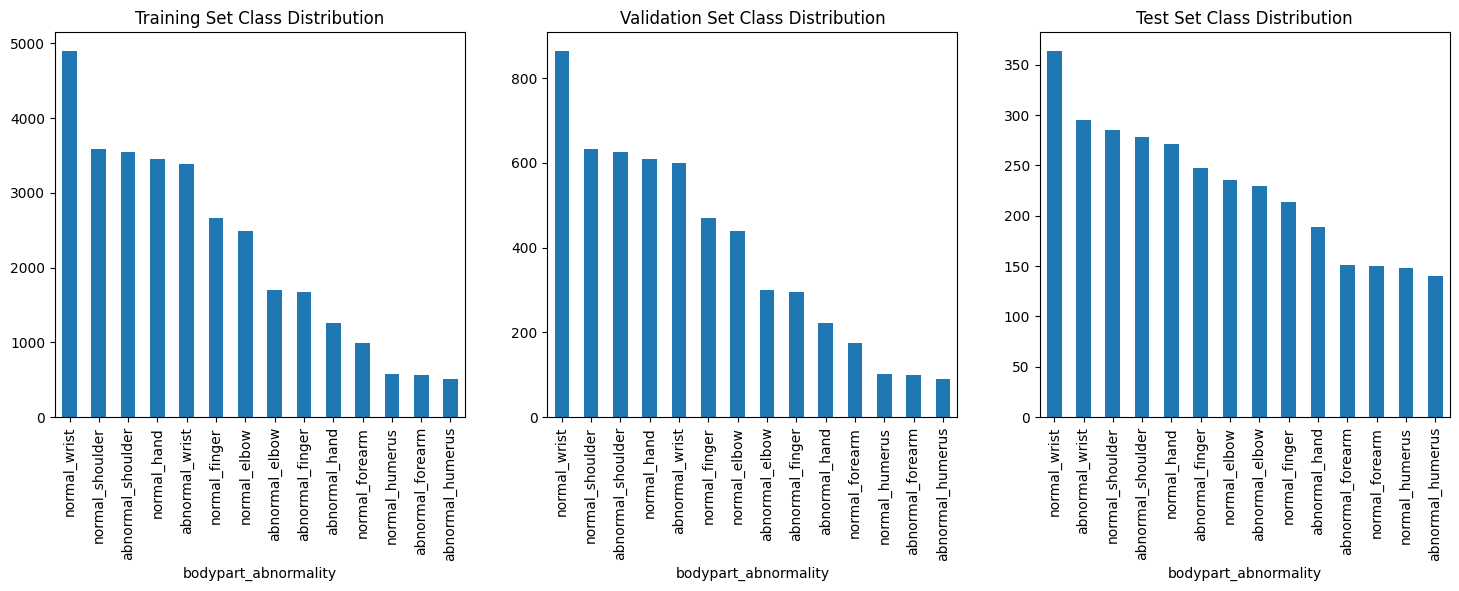

In [2]:
# Plotting the distribution of classes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
train_metadata['bodypart_abnormality'].value_counts().plot(kind='bar', ax=axes[0], title='Training Set Class Distribution')
valid_metadata['bodypart_abnormality'].value_counts().plot(kind='bar', ax=axes[1], title='Validation Set Class Distribution')
test_metadata['bodypart_abnormality'].value_counts().plot(kind='bar', ax=axes[2], title='Test Set Class Distribution')
plt.show()

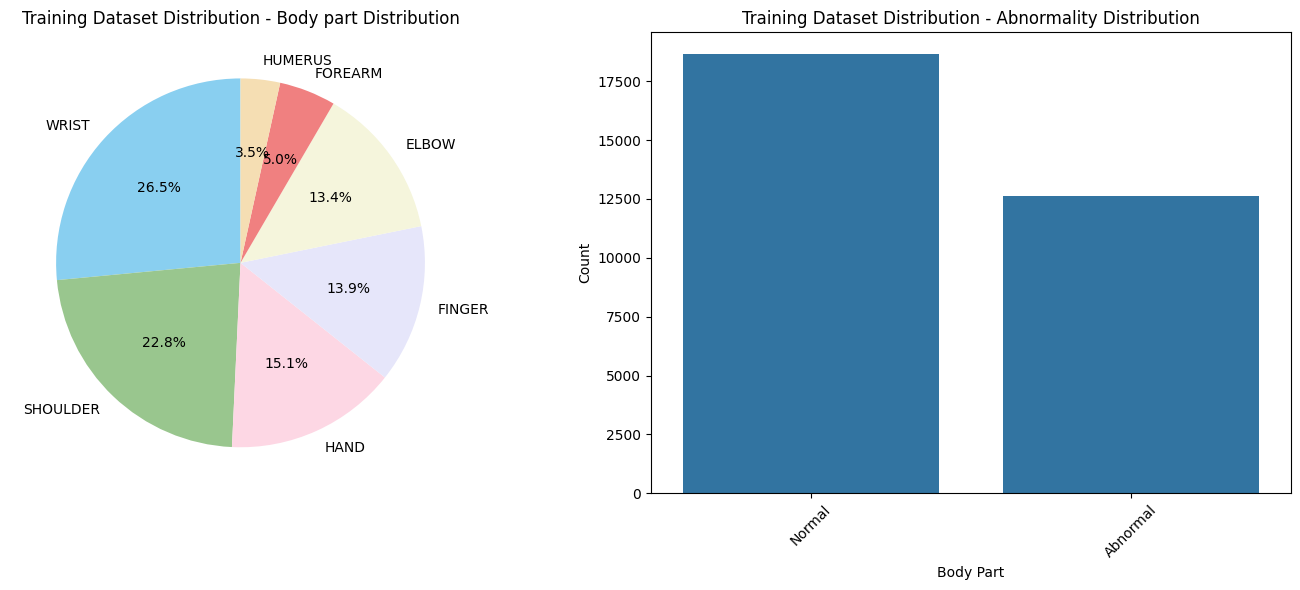

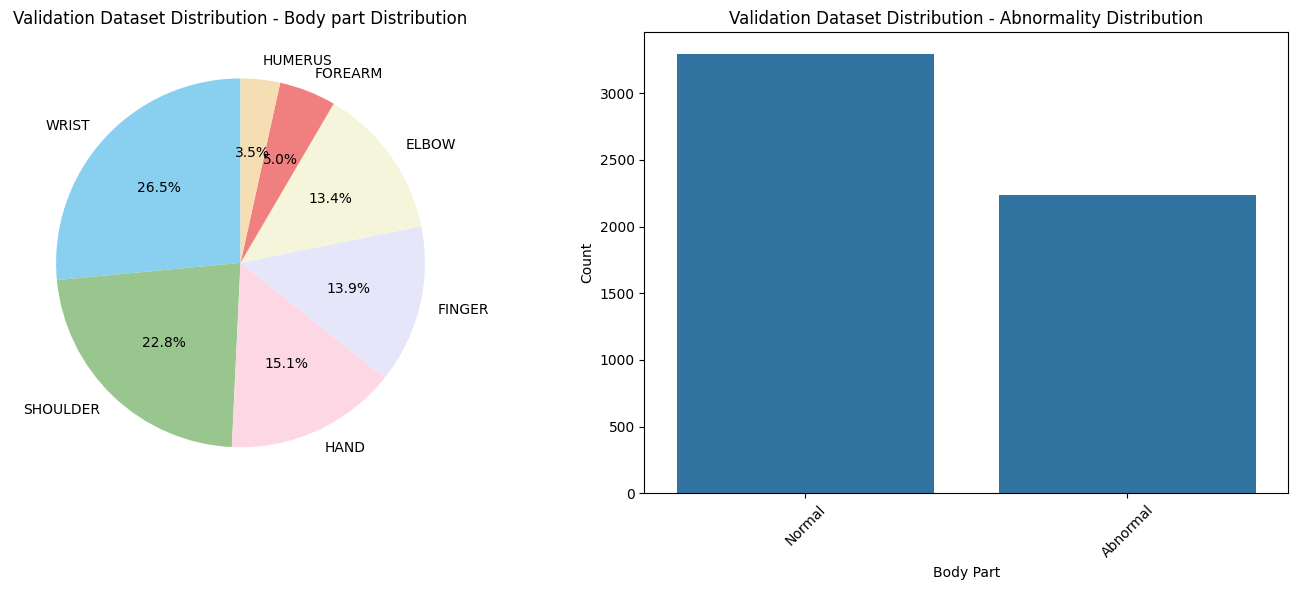

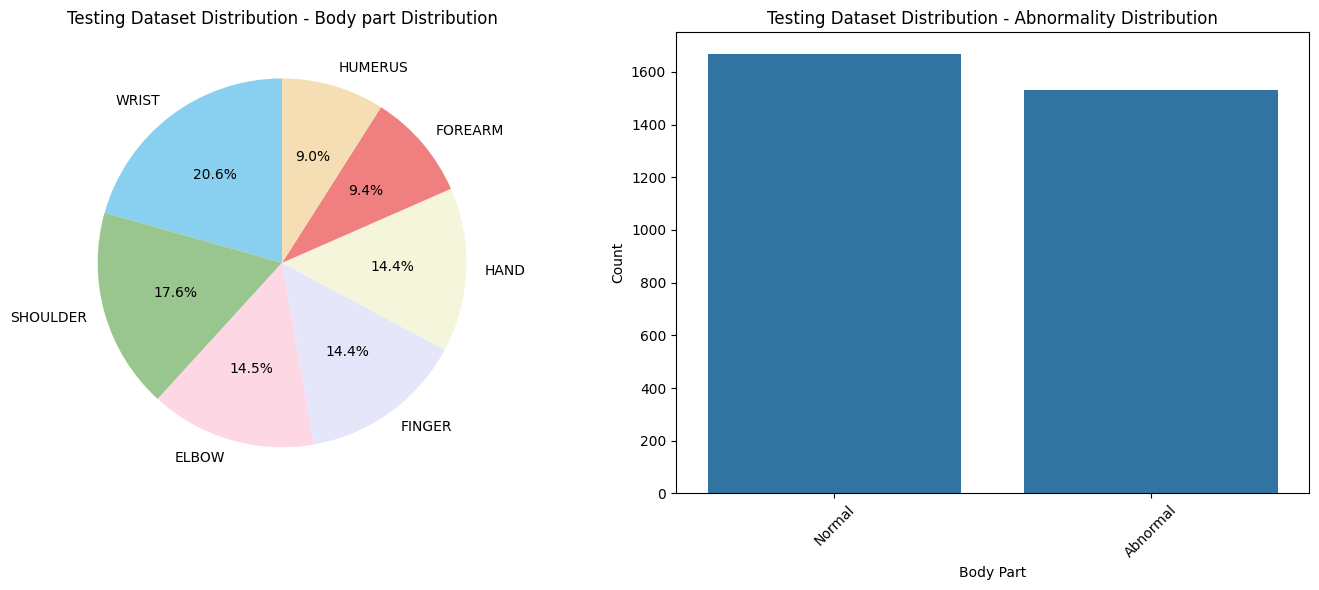

In [13]:
import seaborn as sns

def plot_distributions(data, dataset_name):
    plt.figure(figsize=(14, 6))

    # Pie chart for abnormalities
    plt.subplot(1, 2, 1)
    colors = ['#89CFF0', '#99C68E', '#FDD7E4', '#E6E6FA', '#F5F5DC', '#F08080', '#F5DEB3']
    data['abnormality'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'{dataset_name} - Body part Distribution')
    plt.ylabel('')  # Hide the 'abnormality' label on the y-axis

    # Bar chart for body parts
    plt.subplot(1, 2, 2)
    sns.countplot(data=data, x='Body_part', order=data['Body_part'].value_counts().index)
    plt.title(f'{dataset_name} - Abnormality Distribution')
    plt.xlabel('Body Part')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

plot_distributions(train_metadata, 'Training Dataset Distribution')
plot_distributions(valid_metadata, 'Validation Dataset Distribution')
plot_distributions(test_metadata, 'Testing Dataset Distribution')

In [16]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 39.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


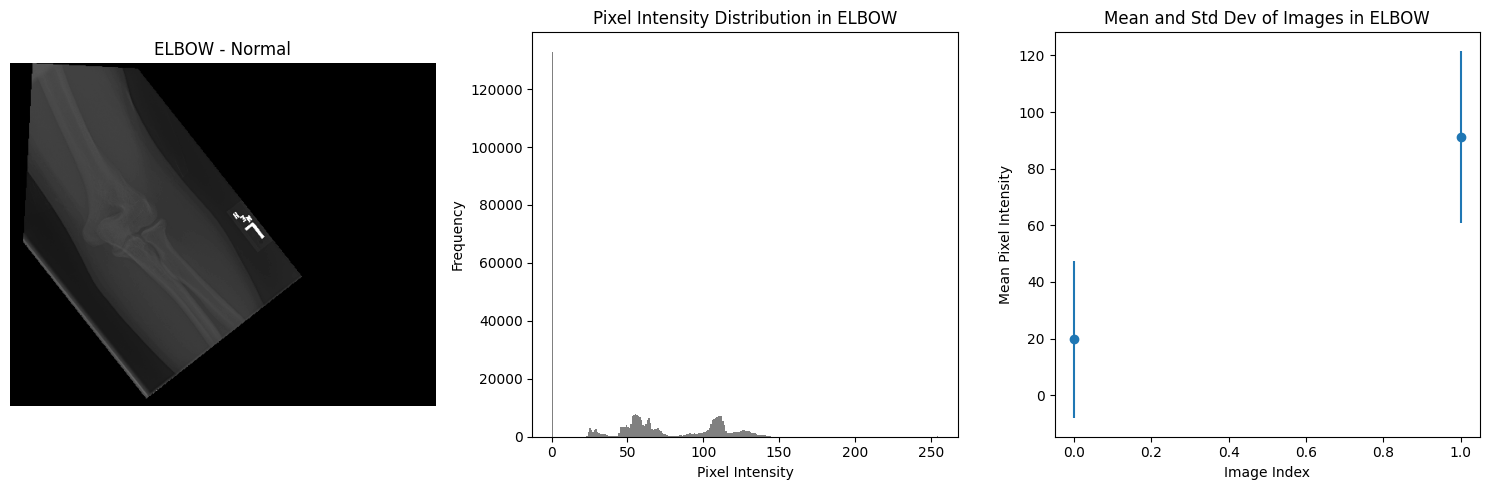

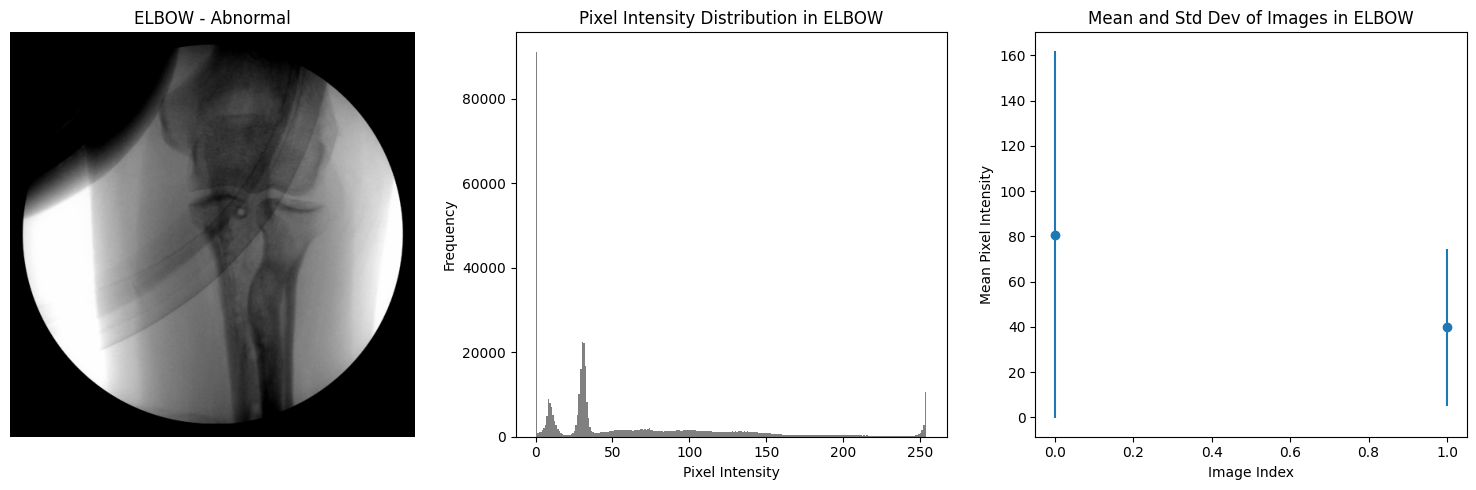

In [24]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def load_images_from_folder(folder, max_images=2):
    images = []
    body_part = folder.split('/')[-1].split('-')[1]  # Assumes folder name includes the body part after 'Abnormal-' or 'Normal-'
    for filename in os.listdir(folder):
        if len(images) >= max_images:
            break  # Stop after loading max_images
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = np.array(img)  # Convert to numpy array for analysis
        if img is not None:
            images.append((img, body_part))
    return images

def plot_image_statistics(images_info, title):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    first_image, body_part = images_info[0]

    # Plot first image
    axs[0].imshow(first_image, cmap='gray')
    axs[0].set_title(f'{body_part} - {title}')
    axs[0].axis('off')
    
    # Aggregate pixel values from all images for histogram
    pixel_values = [pixel for img, _ in images_info for pixel in img.ravel()]
    axs[1].hist(pixel_values, bins=256, color='gray')
    axs[1].set_title(f'Pixel Intensity Distribution in {body_part}')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')
    
    # Compute image mean and std dev
    mean_vals = [np.mean(img) for img, _ in images_info]
    std_vals = [np.std(img) for img, _ in images_info]
    axs[2].errorbar(range(len(images_info)), mean_vals, yerr=std_vals, fmt='o')
    axs[2].set_title(f'Mean and Std Dev of Images in {body_part}')
    axs[2].set_xlabel('Image Index')
    axs[2].set_ylabel('Mean Pixel Intensity')
    
    plt.tight_layout()
    plt.show()

# Example usage
folder_normal = 'multiclass_train/Normal-ELBOW'
folder_abnormal = 'multiclass_train/Abnormal-ELBOW'

normal_images_info = load_images_from_folder(folder_normal, max_images=2)
abnormal_images_info = load_images_from_folder(folder_abnormal, max_images=2)

plot_image_statistics(normal_images_info, 'Normal')
plot_image_statistics(abnormal_images_info, 'Abnormal')

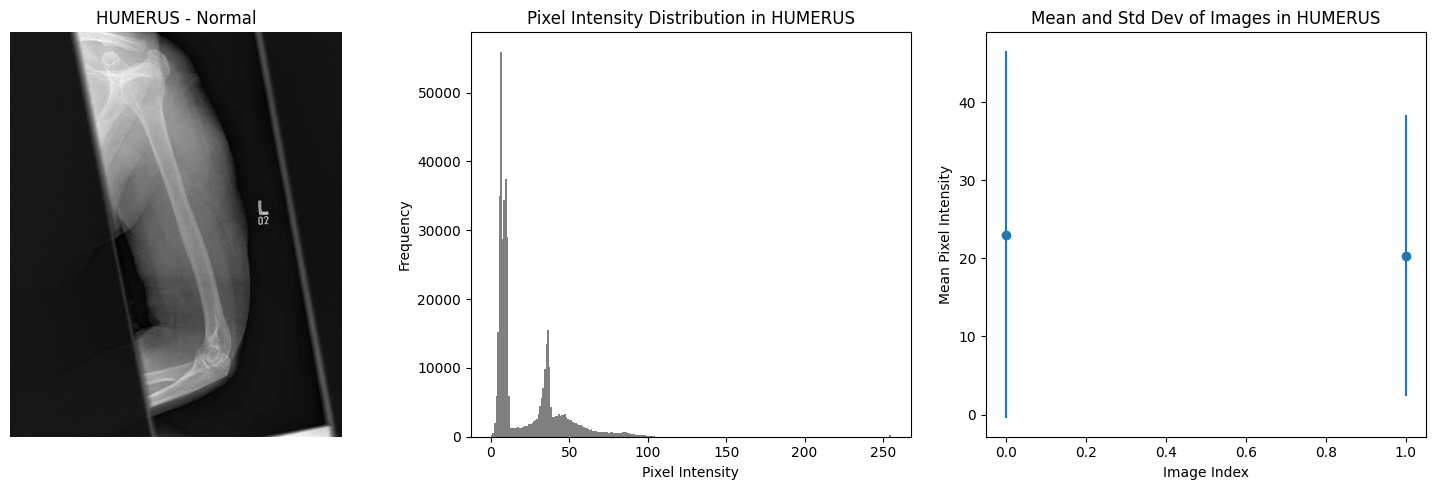

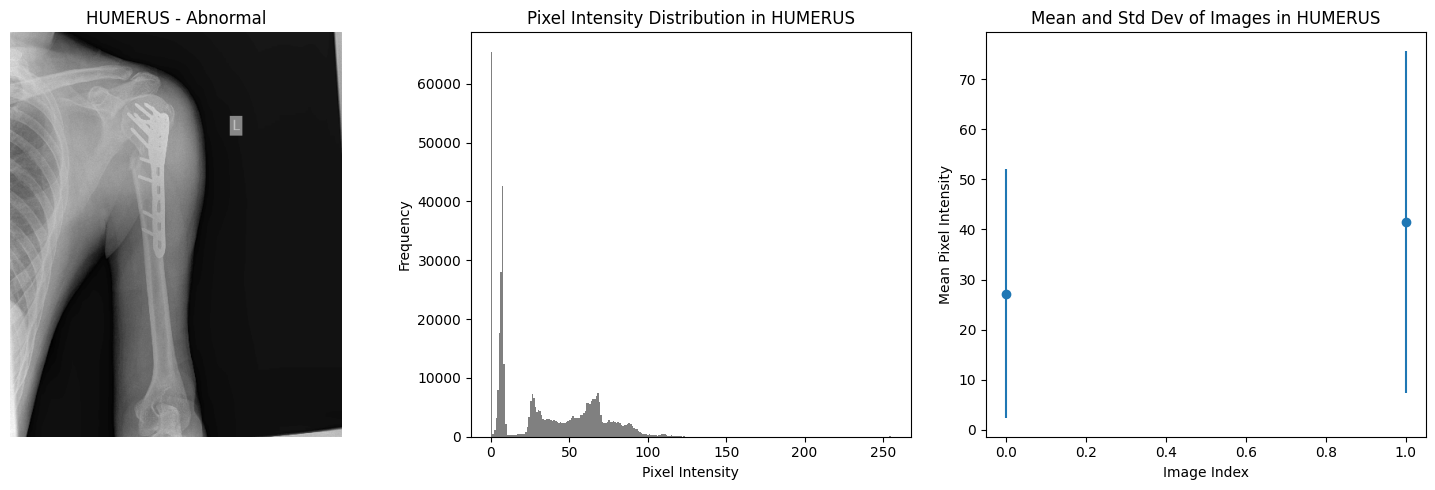

In [25]:
folder_normal = 'multiclass_train/Normal-HUMERUS'
folder_abnormal = 'multiclass_train/Abnormal-HUMERUS'

# Load only 2 images from each category
normal_images = load_images_from_folder(folder_normal, max_images=2)
abnormal_images = load_images_from_folder(folder_abnormal, max_images=2)

# Plotting statistics for the images
plot_image_statistics(normal_images, 'Normal')
plot_image_statistics(abnormal_images, 'Abnormal')